In [47]:
import matplotlib.pyplot as plt
from numpy import median
from numpy import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
data=pd.read_csv("Finalized Data CSV.csv")
model1=RandomForestRegressor()
model2=LinearRegression(normalize=True)
model3=svm.SVR(kernel='linear')
model4=svm.SVR(kernel='rbf')
model5=SGDRegressor()
model6=GradientBoostingRegressor()
model7=ElasticNet()
model8=Ridge()
model9=MLPRegressor()
model10=BaggingRegressor()
model11=KNeighborsRegressor()
data.set_index(['year','state'], inplace = True)
data.dropna(axis = 0, inplace = True)
y=data["Age-Adjusted Rate"]
X1=data.drop("Age-Adjusted Rate",1)
data
data.columns

Index(['felony', 'invcommitment', 'invoutpatient', 'danger', 'drugmisdemeanor',
       'alctreatment', 'alcoholism', 'relinquishment', 'violent', 'violenth',
       ...
       'expartesurrender', 'expartesurrendernoconditions',
       'expartesurrenderdating', 'dvroremoval', 'stalking',
       'Age-Adjusted Rate', 'All Ages in Poverty Percent',
       'Violent Crime Rate', 'Percentage Urban', 'Percentage Black'],
      dtype='object', length=139)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


11.863090615524264
11.857320839673838
1045    0
1244    0
696     0
871     0
628     0
123     0
738     0
1279    0
467     0
201     0
301     0
317     0
1069    0
360     0
721     0
580     0
603     0
420     0
233     0
86      0
1156    0
1189    0
1175    0
796     0
1070    0
299     0
271     0
827     0
838     0
403     0
       ..
1030    0
804     0
992     0
379     0
491     0
333     0
647     0
1095    0
777     0
954     0
62      0
218     0
357     0
808     0
707     0
1120    0
275     0
1258    0
1165    0
965     0
1031    0
733     0
624     0
785     0
235     0
787     0
623     0
824     0
758     0
697     0
Name: universal, Length: 429, dtype: int64
99
0.7910591741822794


In [36]:
import seaborn as sns
import pylab
from scipy.stats import norm
from scipy.stats import ttest_ind

#sns.kdeplot(permitonemeans)
#mean1 = mean(permitonemeans)
#mean0 = mean(permitzeromeans)
#sd1 = np.std(permitonemeans)/(99**0.5)
#sd0 = np.std(permitzeromeans)/(99**0.5)
#x = np.linspace(11, 12.15, 100)
#y = norm.pdf(x, loc =mean1, scale = sd1)
#y1 = norm.pdf(x, loc = mean0, scale = sd0)

#pylab.plot(x, y)
#pylab.plot(x, y1)
#print(np.std(universalonemeans))
#print(np.std(universalzeromeans))
#print(np.std(universalonemeans)/(99**0.5))
#print(np.std(universalzeromeans)/(99**0.5))

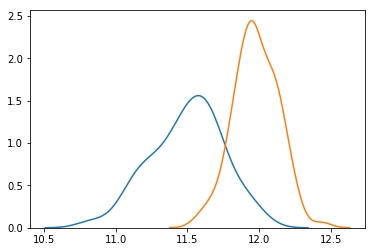

In [85]:
sns.kdeplot(universalonemeans)
sns.kdeplot(universalzeromeans)

In [37]:

def function_with_graph(model,law,iterations):
    onemeans=[]
    zeromeans=[]
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        X1_test[law] = 1
        predicted1 = modeltest.predict(X1_test)
        onemeans.append(mean(predicted1))
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        X1_test[law] = 0
        predicted2 = modeltest.predict(X1_test)
        zeromeans.append(mean(predicted2))
    print(mean(onemeans))
    print(mean(zeromeans))
    t, p = ttest_ind(onemeans, zeromeans)
    print(p)
    mean1 = mean(onemeans)
    mean0 = mean(zeromeans)
    sd1 = np.std(onemeans)/(iterations**0.5)
    sd0 = np.std(zeromeans)/(iterations**0.5)
    x = np.linspace(mean(onemeans)-3*sd1, mean(zeromeans+3*sd0), 100)
    Y = norm.pdf(x, loc =mean1, scale = sd1)
    Y1 = norm.pdf(x, loc = mean0, scale = sd0)
    pylab.plot(x, Y)
    pylab.plot(x, Y1)
    p_values.append(p)
   

In [ ]:
#function_with_graph(model3, "capuses",100)

In [38]:
def function(model,law,iterations):
    onemeans=[]
    zeromeans=[]
    predictedmeans=[]
    actualmeans=[]
    maelist=[]
    r2list=[]
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        predicted = modeltest.predict(X1_test)
        predictedmeans.append(mean(predicted))
        actualmeans.append(mean(y2_test))
        maelist.append(mean_absolute_error(y2_test, predicted))
        r2list.append(r2_score(y2_test, predicted))
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        X1_test[law] = 1
        predicted1 = modeltest.predict(X1_test)
        onemeans.append(mean(predicted1))
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        X1_test[law] = 0
        predicted2 = modeltest.predict(X1_test)
        zeromeans.append(mean(predicted2))
    print(str(model)[:10])
    print("Actual Mean: %.3f"%((mean(actualmeans))))
    print("Predicted Mean: %.3f"%((mean(predictedmeans))))
    print("1 Mean: %.3f"%((mean(onemeans))))
    print("0 Mean: %.3f"%((mean(zeromeans))))
    t1, p1 = ttest_ind(onemeans, zeromeans)
    t2, p2 = ttest_ind(onemeans, predictedmeans)
    t3, p3 = ttest_ind(predictedmeans, zeromeans)
    p_values1.append(p1)
    p_values2.append(p2)
    p_values3.append(p3)
    maes.append(mean(maelist))
    r2.append(mean(r2list))
    

In [49]:
def metafunction(law,iterations):
    useful_model_list=[model1, model6,model8,model10,model11]
    for i in useful_model_list:
        function(i,law,iterations)
    print("0 vs 1")
    print(p_values1)
    print("predicted vs 1")
    print(p_values2)
    print("predicted vs 0")
    print(p_values3)
    print("mae")
    print(maes)
    print("r2")
    print(r2)
    p_values1.sort(reverse=False)
    p_values2.sort(reverse=False)
    p_values3.sort(reverse=False)
    if p_values1[2]<0.003:
        print(law)
        print("0 vs 1 significant")
    else:
        print(law)
        print("0 vs 1 not significant")
    if p_values2[2]<0.003:
        print("predicted vs 1 significant")
    else:
        print("predicted vs 1 not significant")
    if p_values3[2]<0.003:
        print("predicted vs 0 significant")
    else:
        print("predicted vs 0 not significant")
    

In [51]:
p_values1=[]
p_values2=[]
p_values3=[]
maes=[]
r2=[]
import warnings
warnings.filterwarnings("ignore")
metafunction("invoutpatient",100)

RandomFore
Actual Mean: 11.868
Predicted Mean: 11.852
1 Mean: 11.865
0 Mean: 11.849
GradientBo
Actual Mean: 11.868
Predicted Mean: 11.867
1 Mean: 11.866
0 Mean: 11.868
Ridge(alph
Actual Mean: 11.868
Predicted Mean: 11.868
1 Mean: 11.603
0 Mean: 11.940
BaggingReg
Actual Mean: 11.868
Predicted Mean: 11.847
1 Mean: 11.866
0 Mean: 11.849
KNeighbors
Actual Mean: 11.868
Predicted Mean: 11.794
1 Mean: 11.790
0 Mean: 11.796
0 vs 1
[0.49997873445252616, 0.9209643547188939, 1.2451641110050542e-25, 0.47878076123714874, 0.7907251291221441]
predicted vs 1
[0.5904841207172936, 0.9492334114887168, 5.488656442062441e-18, 0.4141634133397605, 0.8734795634664407]
predicted vs 0
[0.9016761936503377, 0.9714041032637715, 0.003154323188897714, 0.9277463460039811, 0.915288476504827]
mae
[0.934566202738058, 1.0727570308728092, 1.240989984513153, 0.9380398618357959, 2.1937998151145077]
r2
[0.9174436678588745, 0.8957711704989202, 0.8630344379051771, 0.9170269777658682, 0.5545521262340386]
invoutpatient
0 vs 1 no

In [25]:
#significant laws, if they have 3 significant models: capuses, permit, violentpartial, cap14, traffickingprohibitedh, recordsdealerh, college, alcoholism, ccrenewbackground, dealerh, immunity, collegeconcealed, age18longgunsale, drugmisdemeanor, preemptionnarrow, mayissue, showing, security, stalking, elementary    
#observations: models to have the same order from least to greatest of pvalues: The first, second, third and 5th models are lower, then the 4th, and then the 6th model is the highest, sometimes final model has p value of 1
#significant laws, if they have 3 significant models with controls: capuses, cap14, permit, violentpartial, age21handgunpossess, ccrenewbackground, drugmisdemeanor, dealerh, recordsdealerh, 



In [41]:
significantlaws=[]
def metametafunction(iterations):
    useful_laws=["cap14","permit","violentpartial","age21handgunpossess","fingerprint","ccrenewbackground","age18longgunsale","drugmisdemeanor","statechecksh","dealerh"]
    for i in useful_laws:
        p_values=[]
        metafunction(i,iterations)
    print (significantlaws)

metametafunction(100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

11.819671904649518
11.948493275398327
1.52679770698632e-07


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


11.676734198965839
12.022817200626255
2.979015772708882e-32
11.871671015193371
11.871671015193371
1.0
10.86575631214604
12.368239695543487
1.749519143899838e-119
[]


IndexError: list index out of range

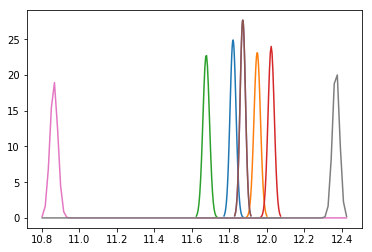

In [5]:
p_values1=[]
p_values2=[]
p_values3=[]
metafunction("dealerh",100)

In [8]:
def zerographfunction(model,law,iterations):
    zeromeans=[]
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        X1_test[law] = 0
        predicted2 = modeltest.predict(X1_test)
        zeromeans.append(mean(predicted2))
    print(mean(zeromeans))
    mean0 = mean(zeromeans)
    sd0 = np.std(zeromeans)/(iterations**0.5)
    x = np.linspace(mean(zeromeans)-3*sd0, mean(zeromeans+3*sd0), 100)
    Y1 = norm.pdf(x, loc = mean0, scale = sd0)
    pylab.plot(x, Y1)

In [9]:
def zerometagraphfunction(law, iterations):
    useful_model_list=[model1, model6,model7,model8]
    for i in useful_model_list:
        zerographfunction(i,law,iterations)
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

11.998051486333356
11.956834834354295
11.871671015193371
11.969883082177676


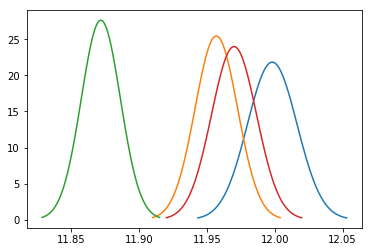

In [12]:
zerometagraphfunction("permit",100)

In [10]:
def onegraphfunction(model,law,iterations):
    onemeans=[]
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        X1_test[law] = 1
        predicted2 = modeltest.predict(X1_test)
        onemeans.append(mean(predicted2))
    print(mean(onemeans))
    mean1 = mean(onemeans)
    sd1 = np.std(onemeans)/(iterations**0.5)
    x = np.linspace(mean(onemeans)-3*sd1, mean(onemeans+3*sd1), 100)
    Y1 = norm.pdf(x, loc = mean1, scale = sd1)
    pylab.plot(x, Y1)

In [11]:
def onemetagraphfunction(law, iterations):
    useful_model_list=[model1, model6,model7,model8]
    for i in useful_model_list:
        onegraphfunction(i,law,iterations)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

10.907561527378553
11.420005943062757
11.871671015193371
10.991725280947884


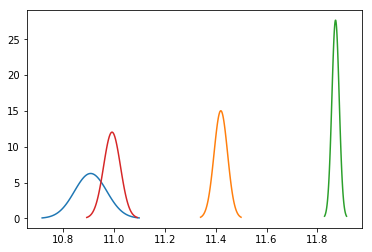

In [15]:
onemetagraphfunction("permit", 100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

10.944312652958304
11.993144201143593
2.8661850498748954e-30


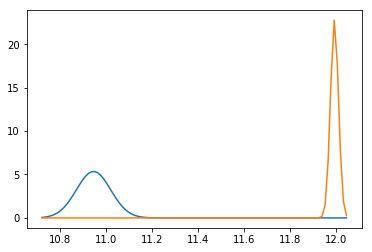

In [5]:
function_with_graph(model1, "permit",100)

In [ ]:
def actualgraphfunction(model,law,iterations):
    zeromeans=[]
    for i in range(0,iterations):
        X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y, test_size=0.33, random_state=i)
        modeltest = model.fit(X1_train, y2_train)
        predicted2 = modeltest.predict(X1_test)
        actualmeans.append(mean(predicted2))
    print(mean(actualmeans))
    meanactual = mean(actualmeans)
    sd = np.std(actualmeans)/(iterations**0.5)
    x = np.linspace(mean(actualmeans)-3*sd0, mean(actualmeans+3*sd0), 100)
    Y1 = norm.pdf(x, loc = meanactual, scale = sd0)
    pylab.plot(x, Y1)